In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings

# Setting up visualization style and warnings
sns.set()
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset
df = pd.read_csv("/home/user/Downloads/archive/insurance.csv")

# Quick overview of the data
display(df.head())
display(df.describe())
display(df.info())

# Check for null values
print("Null values in dataset:")
print(df.isnull().sum())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

Null values in dataset:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Handle missing values if any
if df.isnull().sum().sum() > 0:
    df = df.dropna()
    print("Null values removed.")
else:
    print("No missing values.")


No missing values.


In [ ]:
# Encoding categorical columns
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
df.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Verify encoding
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


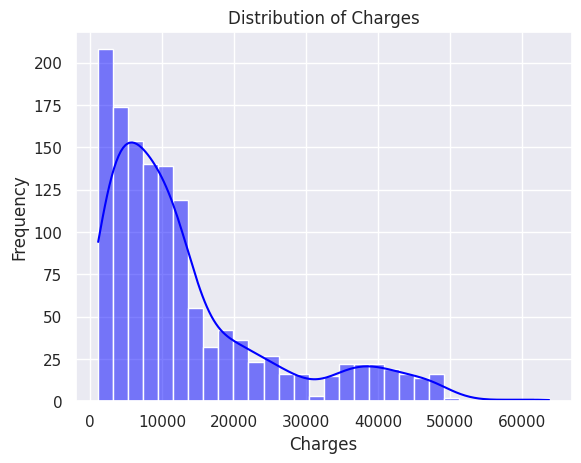

In [ ]:
# Visualizing distribution of target variable
sns.histplot(df['charges'], kde=True, color='blue')
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


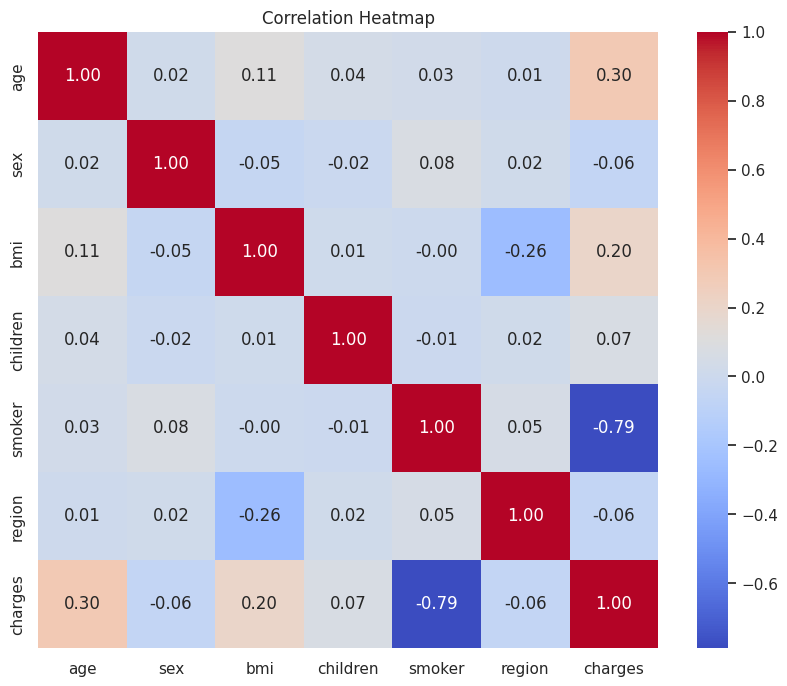

In [ ]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Splitting data into features and target
x = df.drop(columns='charges', axis=1)
y = df['charges']

# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [ ]:
# Standardizing numerical columns
scaler = StandardScaler()
numeric_columns = ['age', 'bmi', 'children']
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

print("Data after standardization:")
display(x_train.head())


Data after standardization:


,age,sex,bmi,children,smoker,region
882,-1.336319,1,-1.418054,-0.930042,1,2
505,-0.180525,0,0.030176,1.561974,1,3
798,1.336454,1,0.398862,-0.930042,1,1
792,-1.264082,1,-1.244896,-0.930042,1,2
201,0.614083,1,0.254702,-0.099370,1,0


In [ ]:
# Training a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting on test data
y_pred = model.predict(x_test)

# Evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 38337035.49


In [ ]:
# Cross-validation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Mean Squared Error: {-np.mean(cv_scores):.2f}")


Cross-Validation Mean Squared Error: 36887309.04


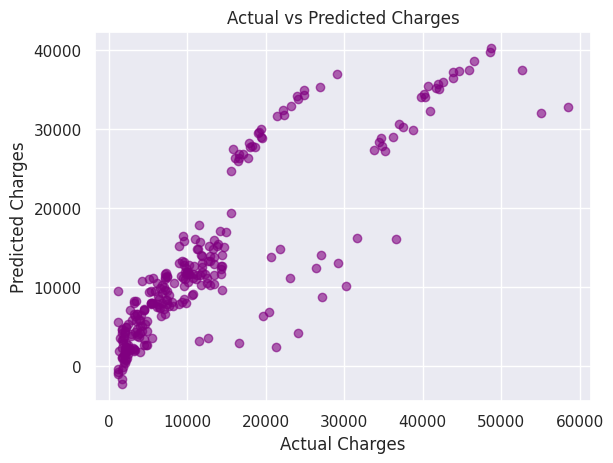

In [ ]:
# Visualizing actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()
